<a href="https://colab.research.google.com/github/seoyujiin/esaa_yb/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[참고](https://github.com/Jpub/MLBook/blob/master/ch04.ipynb)

In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [3]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y, y_pred))

0.9121265377855887


* 정밀도

In [4]:
from sklearn.metrics import precision_score 
print(precision_score(y, y_pred))

0.900990099009901


* 재현율

In [5]:
from sklearn.metrics import recall_score 
print(recall_score(y, y_pred))

0.8584905660377359


* F1 score

In [6]:
from sklearn.metrics import f1_score 
print(f1_score(y, y_pred))

0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [7]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)  # predict_proba(): 개별 데이터별로 예측 확률을 반환하는 메서드, 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환
pred_proba1 = pred_proba[:, 1].reshape(-1, 1) 
binarizer = Binarizer(threshold=0.1)  # y_pred2=(model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)로도 가능
y_pred2 = binarizer.transform(pred_proba1)

In [8]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print(confusion_matrix(y, y_pred2))  # 혼동행렬 
print(accuracy_score(y, y_pred2))  # 정확도
print(precision_score(y, y_pred2))  # 정밀도 
print(recall_score(y, y_pred2))  # 재현율
print(f1_score(y, y_pred2))  # f1 score

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


* ROC 곡선 시각화

In [9]:
from sklearn.metrics import roc_curve 
probas = model_lor.predict_proba(X) 
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

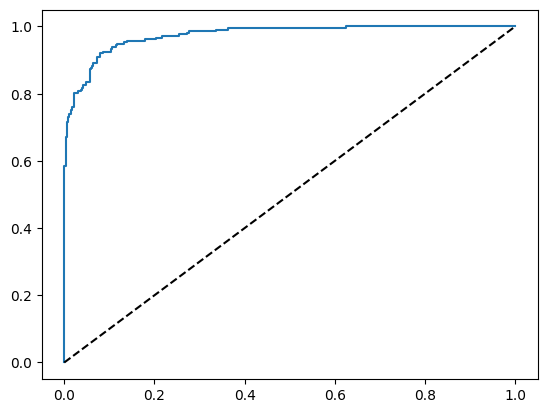

In [10]:
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, label="ROC")  # ROC 곡선이 y=x 직선에 가까울수록 성능이 떨어짐, 멀어질수록 성능이 뛰어남
plt.plot([0, 1], [0, 1], 'k--', label='Random')

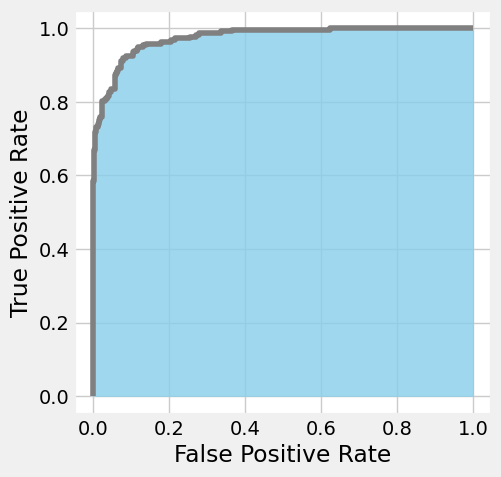

In [11]:
%matplotlib inline

# ROC 곡선의 그래프 영역 스타일 지정
plt.style.use('fivethirtyeight')

# 캔버스와 좌표 평면 생성
fig, ax = plt.subplots()

# 그래프 영역의 크기 설정
fig.set_size_inches(4.8, 5)

# 그래프의 선을 이루는 값과 선 색상 설정
ax.step(fpr, tpr, 'gray')

# 그래프의 선을 기준으로 곡선아래면적을 skyblue로 채우도록 설정
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)

# x축 레이블 설정
ax.set_xlabel('False Positive Rate')

# y축 레이블 설정
ax.set_ylabel('True Positive Rate')

# 그래프 영역 배경색 설정
ax.set_facecolor('xkcd:white')

# 최종 그래프 생성
plt.show()

* ROC AUC 값

In [12]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, y_pred))  # 종속 변수와 예측 확률의 두 번째 요소로 곡선아래면적 계산

0.9012340785370753
